## Install Libraries

In [1]:
import os
import pandas as pd

from matplotlib import pyplot as plt

import psycopg2

from matplotlib_venn import venn2

## Connect to DB

In [2]:
# information used to create a database connection
sqluser = 'postgres'
dbname = 'mimic4'
hostname = 'localhost'
port_number = 5434
schema_name = 'omop_cdm'

# Connect to postgres with a copy of the MIMIC-III database
con = psycopg2.connect(dbname=dbname, user=sqluser, host=hostname, port=port_number, password='mysecretpassword')

# the below statement is prepended to queries to ensure they select from the right schema
query_schema = 'set search_path to ' + schema_name + ';'

## Read data

In [3]:
staticDf = pd.read_csv('data/static_data_v_1.0')
staticDf

,person_id,visit_start_datetime,visit_end_datetime,visit_occurrence_id,visit_occurrence_concept_name,visit_duration_hrs,visit_source_concept_name,admitting_source_value,sepsis
0,1914479621,2134-01-15 02:40:00,2134-01-30 05:00:00,847586405,Emergency Room and Inpatient Visit,362.0,URGENT,TRANSFER FROM HOSPITAL,1
1,-1338579469,2133-11-20 19:18:00,2133-12-31 17:22:00,-165416090,Emergency Room and Inpatient Visit,982.0,URGENT,TRANSFER FROM HOSPITAL,1
2,-1415432419,2187-10-25 13:07:00,2187-11-01 14:30:00,-572431579,Emergency Room and Inpatient Visit,169.0,URGENT,TRANSFER FROM HOSPITAL,1
3,1992624961,2129-05-07 00:00:00,2129-05-17 15:45:00,1059424698,Emergency Room and Inpatient Visit,255.0,URGENT,TRANSFER FROM HOSPITAL,1
4,-893011074,2133-05-06 11:38:00,2133-05-26 15:23:00,-1690463012,Emergency Room and Inpatient Visit,483.0,URGENT,TRANSFER FROM SKILLED NURSING FACILITY,1
...,...,...,...,...,...,...,...,...,...
13679,377467962,2181-05-11 00:48:00,2181-05-20 15:44:00,-1769828987,Emergency Room and Inpatient Visit,230.0,URGENT,TRANSFER FROM HOSPITAL,0
13680,1856055933,2127-03-15 12:38:00,2127-03-20 14:04:00,1553456598,Emergency Room and Inpatient Visit,121.0,URGENT,PHYSICIAN REFERRAL,0
13681,-697207771,2142-07-15 20:10:00,2142-07-22 17:20:00,445525616,Emergency Room - Hospital,165.0,EW EMER.,EMERGENCY ROOM,0
13682,1133671855,2119-12-03 16:56:00,2120-02-18 18:00:00,-736325490,Emergency Room - Hospital,1849.0,EW EMER.,EMERGENCY ROOM,0


In [4]:
staticDf2 = pd.read_csv('data/static_data_v_2.0')
staticDf2

,person_id,visit_start_datetime,visit_end_datetime,visit_occurrence_id,visit_occurrence_concept_name,visit_duration_hrs,visit_source_concept_name,admitting_source_value,sepsis
0,706761387,2188-03-21 20:22:00,2188-04-25 16:22:00,433162270,Emergency Room and Inpatient Visit,836.0,URGENT,TRANSFER FROM HOSPITAL,1
1,1683786691,2133-03-24 04:43:00,2133-04-01 21:33:00,-59688556,Emergency Room and Inpatient Visit,208.0,URGENT,TRANSFER FROM HOSPITAL,1
2,1225572303,2157-11-01 22:30:00,2157-11-02 14:35:00,-211754743,Emergency Room and Inpatient Visit,16.0,URGENT,TRANSFER FROM HOSPITAL,1
3,1225572303,2157-11-01 22:30:00,2157-11-02 14:35:00,-211754743,Emergency Room and Inpatient Visit,16.0,URGENT,TRANSFER FROM HOSPITAL,1
4,1930817712,2111-01-01 19:46:00,2111-01-03 04:24:00,919173749,Emergency Room and Inpatient Visit,32.0,URGENT,TRANSFER FROM HOSPITAL,1
...,...,...,...,...,...,...,...,...,...
41585,1420004681,2128-10-02 10:51:00,2128-10-05 10:25:00,353761385,Emergency Room - Hospital,71.0,EW EMER.,EMERGENCY ROOM,0
41586,-552742661,2135-12-15 23:05:00,2135-12-16 23:30:00,329916201,Emergency Room - Hospital,24.0,EW EMER.,PHYSICIAN REFERRAL,0
41587,-24694497,2141-03-17 10:27:00,2141-03-23 20:09:00,-1382104285,Observation Room,153.0,OBSERVATION ADMIT,TRANSFER FROM HOSPITAL,0
41588,352023899,2150-08-10 06:14:00,2150-08-21 17:09:00,681179376,Emergency Room - Hospital,274.0,EW EMER.,EMERGENCY ROOM,0


In [6]:
vitalsDf = pd.read_csv('data/vitals_data_v_1.0')
vitalsDf

,person_id,measurement_datetime,unit_source_value,value_as_number,concept_name,rn
0,-2147469031,2144-12-31 18:48:00,°F,98.9,Body temperature,1
1,-2147469031,2144-12-31 20:00:00,°F,99.4,Body temperature,2
2,-2147469031,2145-01-01 00:00:00,°F,100.8,Body temperature,3
3,-2147469031,2145-01-01 04:00:00,°F,100.5,Body temperature,4
4,-2147469031,2145-01-01 05:00:00,°F,100.0,Body temperature,5
...,...,...,...,...,...,...
49668133,2147362181,2174-12-24 12:00:00,mmHg,143.0,Systolic blood pressure by Noninvasive,70
49668134,2147362181,2174-12-24 13:00:00,mmHg,109.0,Systolic blood pressure by Noninvasive,71
49668135,2147362181,2174-12-24 14:00:00,mmHg,154.0,Systolic blood pressure by Noninvasive,72
49668136,2147362181,2174-12-24 15:00:00,mmHg,113.0,Systolic blood pressure by Noninvasive,73


In [7]:
labsDf = pd.read_csv('data/labs_data_v_1.0')
labsDf

,person_id,measurement_datetime,unit_source_value,value_as_number,concept_name,rn
0,-2147469031,2144-12-31 16:00:00,mEq/L,20.0,Bicarbonate [Moles/volume] in Serum or Plasma,1
1,-2147469031,2145-01-01 01:47:00,mEq/L,19.0,Bicarbonate [Moles/volume] in Serum or Plasma,2
2,-2147469031,2144-12-31 16:00:00,mEq/L,102.0,Chloride [Moles/volume] in Serum or Plasma,1
3,-2147469031,2145-01-01 01:47:00,mEq/L,104.0,Chloride [Moles/volume] in Serum or Plasma,2
4,-2147469031,2144-12-31 16:00:00,mg/dL,3.2,Creatinine [Mass/volume] in Serum or Plasma,1
...,...,...,...,...,...,...
3215619,2147362181,2174-12-21 00:02:00,mEq/L,147.0,Sodium [Moles/volume] in Serum or Plasma,6
3215620,2147362181,2174-12-21 18:45:00,mEq/L,150.0,Sodium [Moles/volume] in Serum or Plasma,7
3215621,2147362181,2174-12-22 01:57:00,mEq/L,150.0,Sodium [Moles/volume] in Serum or Plasma,8
3215622,2147362181,2174-12-23 03:04:00,mEq/L,141.0,Sodium [Moles/volume] in Serum or Plasma,9


In [8]:
mortalityDf = pd.read_csv('data/mortality_data_v_1.0')
mortalityDf

,visit_occurrence_id,discharge_mortality,one_day_mortality,two_day_mortality,thirty_day_mortality,sixty_day_mortality,ninety_day_mortality
0,-1003022587,False,False,False,False,False,False
1,1282824216,False,False,False,False,False,False
2,1473749252,False,False,False,False,False,False
3,1125153184,False,False,False,False,False,False
4,-931918731,False,False,False,False,False,False
...,...,...,...,...,...,...,...
155312,-2107858853,False,False,False,False,False,False
155313,-521505308,False,False,False,False,False,False
155314,-1950391691,False,False,False,False,False,False
155315,-1081559104,False,False,False,False,False,True


## Basic Exploration

### Static

#### Sepsis according to ICD 9 codes

In [82]:
icdQuery = """
    select
    distinct per.person_id
    from mimiciv.diagnoses_icd icd
    inner join mimiciv.patients pat
    on pat.subject_id = icd.subject_id
    inner join omop_cdm.person per
    on per.person_source_value::int = pat.subject_id
    where (icd_code = '99591' or icd_code = '99592' or icd_code = '78552' or icd_code = 'A419' or icd_code = 'R6520' or icd_code = 'R6521')
    ;
"""
icdDf = pd.read_sql_query(icdQuery, con)
icdDf

,person_id
0,-2146331340
1,-2145820792
2,-2144679073
3,-2144265309
4,-2143892018
...,...
12271,2145490054
12272,2146653386
12273,2146964939
12274,2147138506


#### Overlap between Sepsis obtained from ICD codes and from suspected infection croteria

In [109]:
staticDf

,person_id,visit_start_datetime,visit_end_datetime,visit_occurrence_id,visit_occurrence_concept_name,visit_duration_hrs,visit_source_concept_name,admitting_source_value,sepsis
0,1914479621,2134-01-15 02:40:00,2134-01-30 05:00:00,847586405,Emergency Room and Inpatient Visit,362.0,URGENT,TRANSFER FROM HOSPITAL,1
1,-1338579469,2133-11-20 19:18:00,2133-12-31 17:22:00,-165416090,Emergency Room and Inpatient Visit,982.0,URGENT,TRANSFER FROM HOSPITAL,1
2,-1415432419,2187-10-25 13:07:00,2187-11-01 14:30:00,-572431579,Emergency Room and Inpatient Visit,169.0,URGENT,TRANSFER FROM HOSPITAL,1
3,1992624961,2129-05-07 00:00:00,2129-05-17 15:45:00,1059424698,Emergency Room and Inpatient Visit,255.0,URGENT,TRANSFER FROM HOSPITAL,1
4,-893011074,2133-05-06 11:38:00,2133-05-26 15:23:00,-1690463012,Emergency Room and Inpatient Visit,483.0,URGENT,TRANSFER FROM SKILLED NURSING FACILITY,1
...,...,...,...,...,...,...,...,...,...
13679,377467962,2181-05-11 00:48:00,2181-05-20 15:44:00,-1769828987,Emergency Room and Inpatient Visit,230.0,URGENT,TRANSFER FROM HOSPITAL,0
13680,1856055933,2127-03-15 12:38:00,2127-03-20 14:04:00,1553456598,Emergency Room and Inpatient Visit,121.0,URGENT,PHYSICIAN REFERRAL,0
13681,-697207771,2142-07-15 20:10:00,2142-07-22 17:20:00,445525616,Emergency Room - Hospital,165.0,EW EMER.,EMERGENCY ROOM,0
13682,1133671855,2119-12-03 16:56:00,2120-02-18 18:00:00,-736325490,Emergency Room - Hospital,1849.0,EW EMER.,EMERGENCY ROOM,0


In [93]:
suspectedList = staticDf[staticDf.sepsis == 1].person_id
icdList = icdDf.person_id

In [102]:
suspectedList = suspectedList.to_list()
icdList = icdList.to_list()

In [106]:
overlapCount = 0
for suspectedPerson in suspectedList:
    if suspectedPerson in icdList:
        overlapCount += 1

suppectedOnlyCount = 0
for suspectedPerson in suspectedList:
    if suspectedPerson not in icdList:
        suppectedOnlyCount += 1

icdOnlyCount = 0
for icdPerson in icdList:
    if icdPerson not in suspectedList:
        icdOnlyCount += 1

[suppectedOnlyCount, icdOnlyCount, overlapCount]

[4022, 10141, 2820]

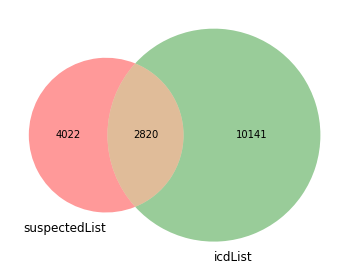

In [107]:
plt.figure(figsize=(6,6))
venn2([suppectedOnlyCount, icdOnlyCount, overlapCount], ('suspectedList', 'icdList'))
plt.show()

#### Sepsis idetified by ICD codes clustering

In [9]:
clusteringDf = staticDf2[["visit_occurrence_concept_name", "visit_duration_hrs", "visit_source_concept_name", "admitting_source_value", "sepsis"]]

In [10]:
clusteringDf

,visit_occurrence_concept_name,visit_duration_hrs,visit_source_concept_name,admitting_source_value,sepsis
0,Emergency Room and Inpatient Visit,836.0,URGENT,TRANSFER FROM HOSPITAL,1
1,Emergency Room and Inpatient Visit,208.0,URGENT,TRANSFER FROM HOSPITAL,1
2,Emergency Room and Inpatient Visit,16.0,URGENT,TRANSFER FROM HOSPITAL,1
3,Emergency Room and Inpatient Visit,16.0,URGENT,TRANSFER FROM HOSPITAL,1
4,Emergency Room and Inpatient Visit,32.0,URGENT,TRANSFER FROM HOSPITAL,1
...,...,...,...,...,...
41585,Emergency Room - Hospital,71.0,EW EMER.,EMERGENCY ROOM,0
41586,Emergency Room - Hospital,24.0,EW EMER.,PHYSICIAN REFERRAL,0
41587,Observation Room,153.0,OBSERVATION ADMIT,TRANSFER FROM HOSPITAL,0
41588,Emergency Room - Hospital,274.0,EW EMER.,EMERGENCY ROOM,0


In [11]:
visitOhtDf = pd.get_dummies(clusteringDf.visit_occurrence_concept_name, prefix='visit_')
visitSourceOhtDf = pd.get_dummies(clusteringDf.visit_source_concept_name, prefix='visit_source_')
admittingSourceOhtDf = pd.get_dummies(clusteringDf.admitting_source_value, prefix='admitting_source_')

In [12]:
X_y = pd.concat([visitOhtDf, visitSourceOhtDf, admittingSourceOhtDf, clusteringDf[["visit_duration_hrs", "sepsis"]]], axis=1)

In [13]:
X = X_y[X_y.columns[:-1]]

In [14]:
y = X_y[["sepsis"]]

In [15]:
from sklearn.cluster import KMeans

y_km = KMeans(n_clusters=2, random_state=250718).fit_predict(X)

In [16]:
from sklearn.cluster import MiniBatchKMeans

y_mbkm = MiniBatchKMeans(n_clusters=2, random_state=250718).fit_predict(X)

In [ ]:
from sklearn.cluster import SpectralClustering

y_sc = SpectralClustering(n_clusters=2, random_state=250718).fit_predict(X)

In [18]:
from sklearn.mixture import GaussianMixture

y_gm = GaussianMixture(n_components=2, random_state=250718).fit_predict(X)

In [19]:
from sklearn.metrics import accuracy_score

accuracy_km = accuracy_score(y, y_km)
accuracy_mbkm = accuracy_score(y, y_mbkm)
# accuracy_sc = accuracy_score(y, y_sc)
accuracy_gm = accuracy_score(y, y_gm)
accuracy_km, accuracy_mbkm, accuracy_gm

(0.5547487376773262, 0.5445299350805483, 0.597114691031498)

#### Visit Duration

Text(0, 0.5, 'Count')

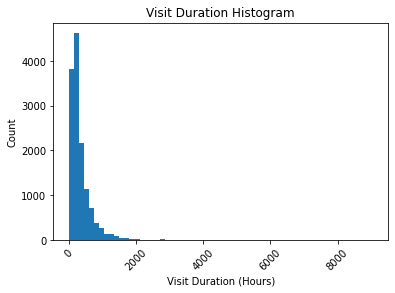

In [21]:
fig, ax = plt.subplots()
plt.xticks(rotation = 45)
plt.hist(staticDf.visit_duration_hrs, bins=60)

ax.set_title('Visit Duration Histogram')
ax.set_xlabel('Visit Duration (Hours)')
ax.set_ylabel('Count')

#### Visit Distribution

Text(0.5, 0, 'Visit')

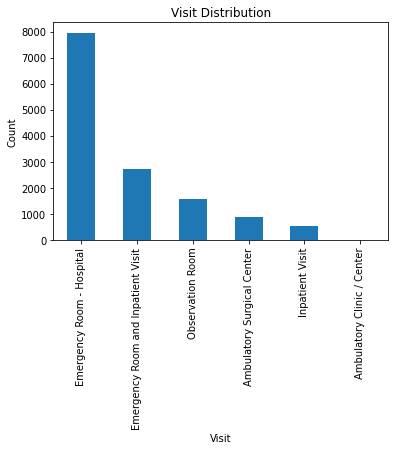

In [33]:
fig, ax = plt.subplots()
plt.xticks(rotation = 90)
staticDf.visit_occurrence_concept_name.value_counts().plot(kind='bar')

ax.set_title('Visit Distribution')
ax.set_ylabel('Count')
ax.set_xlabel('Visit')

#### Visit Source Distribution

Text(0.5, 0, 'Visit Source')

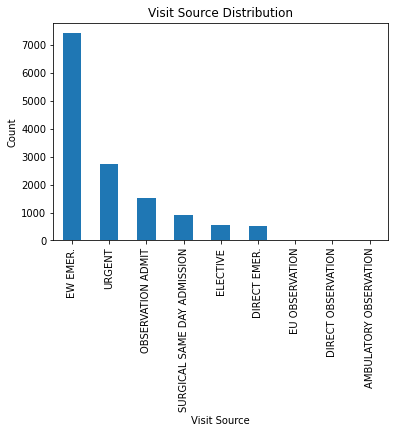

In [32]:
fig, ax = plt.subplots()
plt.xticks(rotation = 90)
staticDf.visit_source_concept_name.value_counts().plot(kind='bar')

ax.set_title('Visit Source Distribution')
ax.set_ylabel('Count')
ax.set_xlabel('Visit Source')

#### Admitting Source Distribution

Text(0.5, 0, 'Admitting Source')

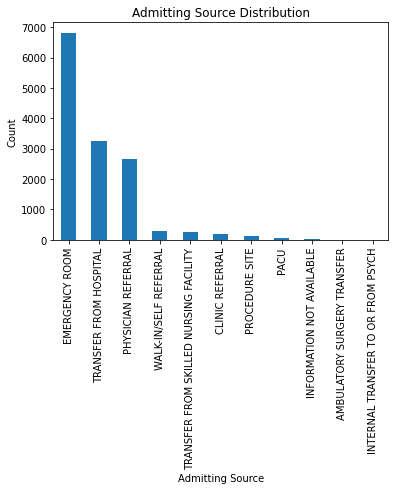

In [34]:
fig, ax = plt.subplots()
plt.xticks(rotation = 90)
staticDf.admitting_source_value.value_counts().plot(kind='bar')

ax.set_title('Admitting Source Distribution')
ax.set_ylabel('Count')
ax.set_xlabel('Admitting Source')

### Mortality

In [57]:
mortalityData = []
mortalityData.append(['Discharge Mortality', mortalityDf.discharge_mortality.sum()])
mortalityData.append(['One Day Mortality', mortalityDf.one_day_mortality.sum()])
mortalityData.append(['Two Day Mortality', mortalityDf.two_day_mortality.sum()])
mortalityData.append(['Thirty Mortality', mortalityDf.thirty_day_mortality.sum()])
mortalityData.append(['Sixty Mortality', mortalityDf.sixty_day_mortality.sum()])
mortalityData.append(['Ninety Mortality', mortalityDf.ninety_day_mortality.sum()])

In [61]:
plotDf = pd.DataFrame(mortalityData, columns=["mortality_class", "cnt"])
plotDf

,mortality_class,cnt
0,Discharge Mortality,9287
1,One Day Mortality,9959
2,Two Day Mortality,10129
3,Thirty Mortality,16127
4,Sixty Mortality,22905
5,Ninety Mortality,28877


In [62]:
plotDf.cnt

0     9287
1     9959
2    10129
3    16127
4    22905
5    28877
Name: cnt, dtype: int64

Text(0.5, 0, 'Mortality Class')

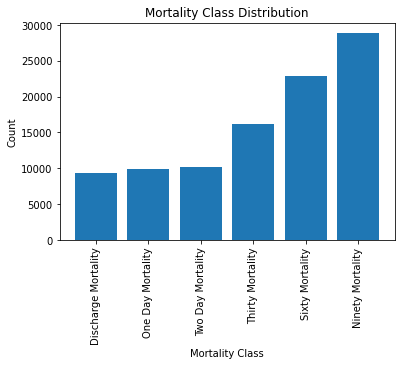

In [65]:
fig, ax = plt.subplots()
plt.xticks(rotation = 90)
plt.bar(x=plotDf.mortality_class, height=plotDf.cnt)

ax.set_title('Mortality Class Distribution')
ax.set_ylabel('Count')
ax.set_xlabel('Mortality Class')

## Combine data

In [10]:
tmpDf = pd.merge(staticDf, vitalsDf, how='inner', on='person_id')

In [14]:
tmpDf.shape

(246373198, 13)

In [16]:
tmpDf.head()

,person_id,visit_start_datetime,visit_end_datetime,visit_occurrence_id,visit_occurrence_concept_name,visit_duration_hrs,visit_source_concept_name,admitting_source_value,measurement_datetime,unit_source_value,value_as_number,concept_name,rn
0,-1905748923,2185-01-01 16:29:00,2185-01-09 16:40:00,508956015,Emergency Room - Hospital,192.0,DIRECT EMER.,PHYSICIAN REFERRAL,2178-09-09 06:36:00,°F,96.1,Body temperature,1
1,-1905748923,2185-01-01 16:29:00,2185-01-09 16:40:00,508956015,Emergency Room - Hospital,192.0,DIRECT EMER.,PHYSICIAN REFERRAL,2178-09-09 08:00:00,°F,97.4,Body temperature,2
2,-1905748923,2185-01-01 16:29:00,2185-01-09 16:40:00,508956015,Emergency Room - Hospital,192.0,DIRECT EMER.,PHYSICIAN REFERRAL,2178-09-09 14:00:00,°F,97.6,Body temperature,3
3,-1905748923,2185-01-01 16:29:00,2185-01-09 16:40:00,508956015,Emergency Room - Hospital,192.0,DIRECT EMER.,PHYSICIAN REFERRAL,2178-09-09 16:00:00,°F,96.9,Body temperature,4
4,-1905748923,2185-01-01 16:29:00,2185-01-09 16:40:00,508956015,Emergency Room - Hospital,192.0,DIRECT EMER.,PHYSICIAN REFERRAL,2178-09-09 06:25:00,mmHg,78.0,Diastolic blood pressure by Noninvasive,1


In [ ]:
tmpDf[(tmpDf.measurement_datetime > tmpDf.visit_start_datetime) & (tmpDf.measurement_datetime < tmpDf.visit_start_datetime)].shape